In [ ]:
#!unzip /content/drive/MyDrive/LDS6_K278_ONLINE_NguyenMinhHung/LDS6_K278_NguyenMinhHung_Cuoi_ky/Data/chinese_mnist.zip -d /content/drive/MyDrive/LDS6_K278_ONLINE_NguyenMinhHung/LDS6_K278_NguyenMinhHung_Cuoi_ky/Data

### import lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [3]:
from IPython.core.display import HTML
import cv2
from tqdm import tqdm
import skimage.io as ski
from datetime import datetime

### read data

In [4]:
df = pd.read_csv("/content/drive/MyDrive/LDS6_K278_ONLINE_NguyenMinhHung/LDS6_K278_NguyenMinhHung_Cuoi_ky/Data/chinese_mnist.csv")
df.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   suite_id   15000 non-null  int64 
 1   sample_id  15000 non-null  int64 
 2   code       15000 non-null  int64 
 3   value      15000 non-null  int64 
 4   character  15000 non-null  object
dtypes: int64(4), object(1)
memory usage: 586.1+ KB


In [6]:
characters = df['character'].unique().tolist()
print(characters)
print(len(characters))

['九', '十', '百', '千', '万', '亿', '零', '一', '二', '三', '四', '五', '六', '七', '八']
15


In [7]:
values = df['value'].unique().tolist()
print(values)
print(len(values))

[9, 10, 100, 1000, 10000, 100000000, 0, 1, 2, 3, 4, 5, 6, 7, 8]
15


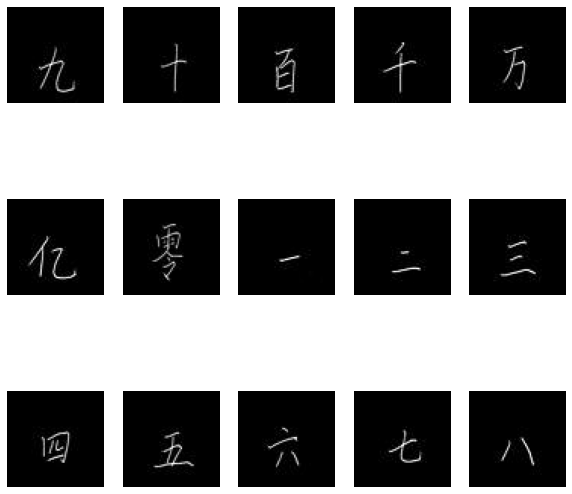

In [8]:
#print sample images
sample_imgs = []
for val in df["value"].unique():
    row = df[df["value"] == val].iloc[0]
    dir_path = "/content/drive/MyDrive/LDS6_K278_ONLINE_NguyenMinhHung/LDS6_K278_NguyenMinhHung_Cuoi_ky/Data/data/data"
    key = f"{dir_path}/input_{row['suite_id']}_{row['sample_id']}_{row['code']}.jpg"
    img = cv2.imread(key, 0)
    sample_imgs.append(img)
plt.figure(figsize=(10, 10))
for i, img in enumerate(sample_imgs):
    plt.subplot(3, 5, i + 1)
    plt.axis('off')
    plt.imshow(img, cmap="gray")

In [9]:
index = df.iloc[:,:-2].values 
value = df["code"].values

In [10]:
filename_label_link = {}
filename_list = []
label_list = []
listImageArray = []
listImageNameArray = [] 

for i in range(0,len(value)):
    codeImage= index[i]
    filename = "input_%s_%s_%s.jpg" % (codeImage[0], codeImage[1], codeImage[2])
    val = value[i] 
    filename_label_link[filename] = val
    filename_list.append(filename)
    label_list.append(val)
    a = cv2.imread("/content/drive/MyDrive/LDS6_K278_ONLINE_NguyenMinhHung/LDS6_K278_NguyenMinhHung_Cuoi_ky/Data/data/data/%s"%filename,0)
    listImageArray.append(a)
    listImageNameArray.append(val)

In [11]:
listImageArray = np.array(listImageArray)
listImageNameArray = np.array(listImageNameArray)
print(listImageArray.shape)
print(listImageNameArray.shape)

(15000, 64, 64)
(15000,)


In [12]:
from sklearn.preprocessing import scale

In [13]:
print("Before flatten:",listImageArray.shape)

listFlattened = []

# Duoi thang tung tam hinh ra 64x64 = 4096 cot
for i in range(len(listImageArray)):
    listFlattened.append(listImageArray[i].flatten()/255)

listFlattened = np.array(listFlattened)
listFlattenedScale = scale(listFlattened)

Before flatten: (15000, 64, 64)


In [14]:
print(listFlattenedScale.shape)

(15000, 4096)


### build model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(listFlattenedScale,listImageNameArray, test_size = 0.2, random_state = 0)



print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_train[0] shape: ",X_train[0])
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)
print("y_test[0] shape: ",y_test[0])

x_train:  (12000, 4096)
y_train:  (12000,)
x_train[0] shape:  [ 0.          0.          0.         ... -0.01516048 -0.01558956
 -0.0139023 ]
x_test:  (3000, 4096)
y_test:  (3000,)
y_test[0] shape:  11


In [45]:
# lua chon SVC do mot so tieu chi:
# - du lieu lon
# - khong gian du lieu co so chieu cao
# - xu li linh dong giua tuyen tinh va phi tuyen

In [17]:
# model
model = svm.SVC(C=10, gamma=0.001, kernel="rbf")
start = datetime.now()
model.fit(X_train, y_train)
end = datetime.now()
print('Time taken to train the model: ', end-start)

Time taken to train the model:  0:07:58.654678


In [18]:
# train score
model.score(X_train,y_train)

0.99275

In [19]:
# test score
model.score(X_test, y_test)

0.658

In [20]:
y_pred = model.predict(X_test)

In [21]:
# metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

Accuracy:  0.658 

[[177   0   0   1   0   1   0   0   0   1   0   8   3   1   0]
 [ 12 173   3   1   1   0   1   0   0   0   0   0   0   1   1]
 [ 23  21 114  26   0   0   2   0   1   0   1   0   2   0   2]
 [ 35   6  25 146   0   5   3   1   0   0   1   3   2   1   1]
 [ 40   0   1   0 125   3   3   2   0   1   4   6   0   3   4]
 [ 43   1   2   6   3 124   2   4   0   3   1  10   0   5   4]
 [ 20   3   5   1   2   1 139   4   3   4   3   2   9  11   3]
 [ 19   0   1   1   5   4   2 127   1   8   5   8   5   7  12]
 [ 35   2   1   2   1   0   6   1 136   2   1   0   1   1   6]
 [ 31   0   0   0   3   1   6  17   1 119   1   2   2   3  16]
 [ 18   5   2   1   2   0   4   0   0   1 129   0  27   2   2]
 [ 45   0   0   0   9   6   1   1   0   3   2 103   3  10   1]
 [ 29   2   0   0   2   2  12   1   1   1  20   0 110   1   1]
 [ 35   0   1   0   3   2   6   5   2   8   2  11   2 122   4]
 [ 52   0   0   0   6   2   2  12   4   6   1   1   3   1 130]] 



In [22]:
# nhan xet: thoi gian tinh toan cua model rat lau, model bi overfitting

### PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(0.9)

In [37]:
X_train_pca = pca.fit_transform(X_train)

In [38]:
X_test_pca = pca.transform(X_test)

In [39]:
X_train_pca.shape

(12000, 772)

In [40]:
X_test_pca.shape

(3000, 772)

In [41]:
# model
model_1 = svm.SVC(C=10, gamma=0.001, kernel="rbf")
start = datetime.now()
model_1.fit(X_train_pca, y_train)
end = datetime.now()
print('Time taken to train the model: ', end-start)

Time taken to train the model:  0:00:53.931522


In [42]:
# Accuracy score
print('Accuracy on training set: ', model_1.score(X_train_pca, y_train))
print('Accuracy on test set: ', model_1.score(X_test_pca, y_test))

Accuracy on training set:  0.9806666666666667
Accuracy on test set:  0.728


In [43]:
# nhan xet: thoi gian xu ly cua model da nhanh hon han so voi viec khong qua xu ly PCA
# model van bi overfitting

Text(0, 0.5, 'Cumulative explained variance')

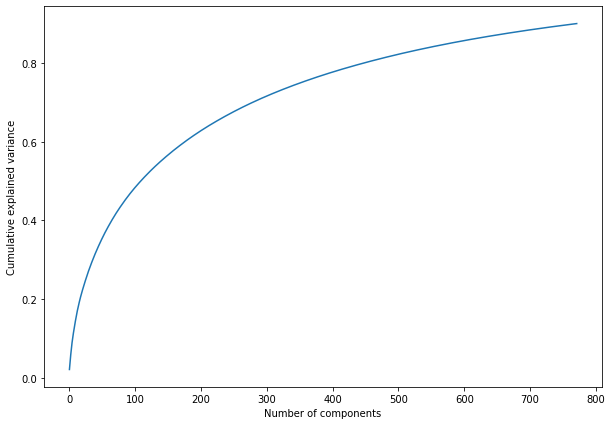

In [44]:
# Cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')